In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [16]:
val_batch = 10
train_batch = 20
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.3,
        validation_split=0.4,
        horizontal_flip=True,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(180, 180),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        shuffle = True
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(180, 180),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        shuffle= True)


Found 2597 images belonging to 5 classes.
Found 1726 images belonging to 5 classes.


In [17]:
len(validation_generator[172])

2

In [18]:
validation_generator[172][1]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [19]:
validation_generator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [20]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [21]:
len(train_generator[129][1])

17

In [22]:
#MOdels with COnv2D and Maxpooling
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [24]:
%tensorflow_version 2.x
import tensorflow as tf

In [25]:
with tf.device('/device:GPU:0'):
  result = model.fit(
          train_generator,
          steps_per_epoch=30,
          epochs=50,
          validation_data=validation_generator,
          validation_steps=30)

Epoch 1/50
30/30 [==============================] - 156s 5s/step - loss: 1.5908 - accuracy: 0.2501 - val_loss: 1.4796 - val_accuracy: 0.3767
Epoch 2/50
30/30 [==============================] - 121s 4s/step - loss: 1.4143 - accuracy: 0.3729 - val_loss: 1.3408 - val_accuracy: 0.3700
Epoch 3/50
30/30 [==============================] - 96s 3s/step - loss: 1.3030 - accuracy: 0.4501 - val_loss: 1.2037 - val_accuracy: 0.4700
Epoch 4/50
30/30 [==============================] - 86s 3s/step - loss: 1.2113 - accuracy: 0.4807 - val_loss: 1.1057 - val_accuracy: 0.5033
Epoch 5/50
30/30 [==============================] - 76s 3s/step - loss: 1.2282 - accuracy: 0.4701 - val_loss: 1.0896 - val_accuracy: 0.5500
Epoch 6/50
30/30 [==============================] - 74s 2s/step - loss: 1.0701 - accuracy: 0.6176 - val_loss: 1.1483 - val_accuracy: 0.5667
Epoch 7/50
30/30 [==============================] - 69s 2s/step - loss: 1.0840 - accuracy: 0.5753 - val_loss: 1.0266 - val_accuracy: 0.5833
Epoch 8/50
30/30 [

In [26]:
model.evaluate(validation_generator)

173/173 [==============================] - 50s 290ms/step - loss: 0.8798 - accuracy: 0.6883


[0.8798477053642273, 0.6882966160774231]

In [27]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

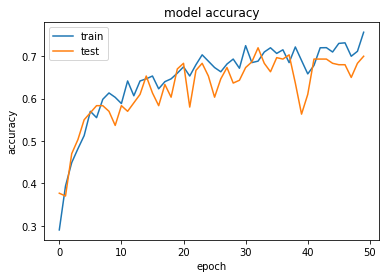

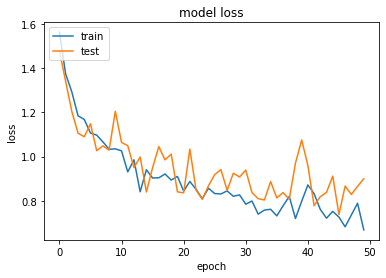

In [28]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
y_pred1 = model.predict(validation_generator)

In [30]:
y_pred1.shape

(1726, 5)

In [31]:
list1 = []
for i in range(0,len(validation_generator)):
  for j in range(0,val_batch):
    try:
      list1.append(validation_generator[i][1][j].tolist())
    except:
      break

In [32]:
np.argmax(y_pred1, axis=1)[0:30]

array([4, 4, 2, 3, 4, 1, 0, 4, 3, 3, 1, 2, 3, 3, 0, 1, 0, 0, 0, 3, 4, 3,
       4, 1, 3, 3, 4, 3, 1, 4])

In [33]:
np.argmax(list1[0:30],axis=1)

array([1, 2, 0, 3, 4, 1, 4, 0, 0, 2, 1, 4, 1, 1, 4, 1, 4, 0, 4, 0, 0, 1,
       3, 0, 4, 1, 2, 1, 1, 4])